# Машинное обучение
## Лабораторная работа №2

Выполнил студент группы 15-В-2   
Кукло Кирилл

Вариант №34

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')

### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

**Набор данных описывает характеристики вина. Научим классификатор предсказывать тип вина по этим характеристикам**

| Переменная   | Описание  | Параметры(Ключи)  | 
|--------------|--------------|-------------------|
|type|тип вина|категории: 1, 2, 3|
|alcohol|содержание алкоголя|вещественный|
|acid|кислотность| вещественный|
|ash|пепел|вещественный|
|alcalinity|щелочность|вещественный|
|magnesium|магний|вещественный|
|total phenols|количество фенолов|вещественный|
|flavanoids|флавоноиды|вещественный|
|proanthocyanins|проатноцианидины|вещественный|
|color intesity|интенсивность цвета|вещественный|
|hue|оттенок|вещественный|
|od280|od280|вещественный|
|proline|пролин|вещественный|

In [2]:
header = ['type', 'alcohol', 'acid', 'ash', 
          'alcalinity', 'magnesium', 'total phenols', 'flavanoids',
          'nonflavanoid phenols', 'proanthocyanins', 'color intensity',
          'hue', 'od280', 'proline']
df = pd.read_csv('wine.data.txt', names=header) 
df.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 2) Удалите дубликаты строк в наборе данных

In [3]:
df = df.drop_duplicates()
print('dataset size: ', df.shape)
df.count()

dataset size:  (178, 14)


type                    178
alcohol                 178
acid                    178
ash                     178
alcalinity              178
magnesium               178
total phenols           178
flavanoids              178
nonflavanoid phenols    178
proanthocyanins         178
color intensity         178
hue                     178
od280                   178
proline                 178
dtype: int64

### 3) Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

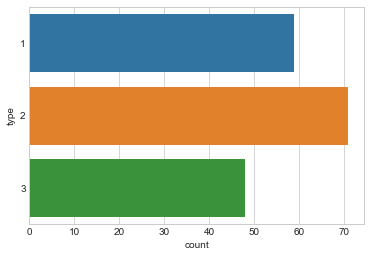

In [4]:
sns.countplot(data=df, y='type')
plt.show()

Классы не сбалансированы, поэтому в качестве метрики оценки качества будем использовать PR кривую

### 4)  Выполните масштабирование количественных признаков

In [5]:
df['type'] = df['type'].apply(lambda x: str(x))

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,1,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### 5) Выполните замену категориальных признаков

In [6]:
lb_make = LabelEncoder() 
df["type"] = lb_make.fit_transform(df["type"])
df.head()

,type,alcohol,acid,ash,alcalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280,proline
0,0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### 6) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

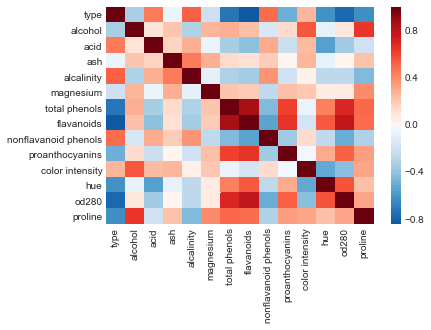

In [7]:
df_corr = df.corr()
colors = sns.color_palette("Blues_r", n_colors=100)
colors += sns.color_palette("Reds", n_colors=100)
sns.heatmap(df_corr, cmap=colors, center=0)
plt.show()

### 7)   Заполните пропущенные значения в данных
Пропущеных значений нет

### 8)	Решите поставленную задачу классификации в соответствии с заданием
- классификатор K ближайших соседей
- логический классификатор (бинарное решающее дерево)

In [8]:
X, y = df.drop('type', axis=1), df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [9]:
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 50))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

rnc = KNeighborsClassifier(n_neighbors=best_num)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score:  0.9838709677419355 	 at neighbors number:  29
test score:  0.981481481481


In [10]:
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,8)), 'max_features': list(range(1,8))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9354838709677419 	 at features number: 7 	 at depth: 5
test score:  0.944444444444


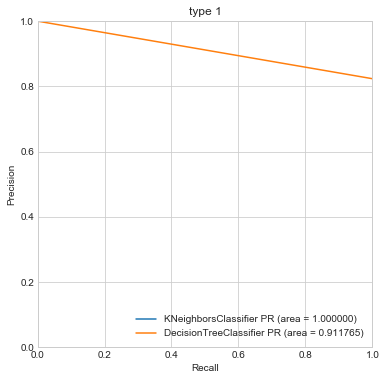

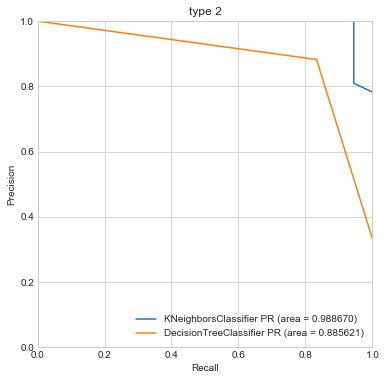

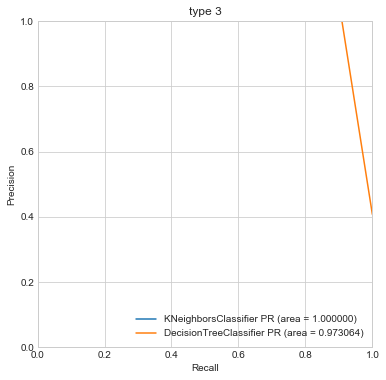

In [12]:

knn = KNeighborsClassifier ( n_neighbors =best_num)
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_knn = knn.fit(X_train, y_train).predict_proba(X_test)
probas_dtc = dtc.fit(X_train, y_train).predict_proba(X_test)

plt.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_knn[:,0])
aps_knn = average_precision_score(y_test[:,0],probas_knn[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,0], probas_dtc[:,0])
aps_dtc = average_precision_score(y_test[:,0],probas_dtc[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('type 1')
plt.show()

plt.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_knn[:,1])
aps_knn = average_precision_score(y_test[:,1],probas_knn[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_dtc[:,1])
aps_dtc = average_precision_score(y_test[:,1],probas_dtc[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('type 2')
plt.show()

plt.figure(figsize=(6,6))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_knn[:,2])
aps_knn = average_precision_score(y_test[:,2],probas_knn[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_dtc[:,2])
aps_dtc = average_precision_score(y_test[:,2],probas_dtc[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('type 3')
plt.show()

### 9)	Сравните кривые для классификаторов, указанных в задании, сделайте выводы
Классификаторы дерево принятия решений и k ближайших соседей работают, так как предсказывают класс с вероятностью 0.9-1, а при случйном предсказании такая вероятность будет равна 0.33 (имеется 3 класса)